# Test Espectrómetro Avantes

**Autores**: Joaquín Andrés Porras

**Fecha**:   27/05/2024

**Motivación**: Proyecto VDOEST, Polarímetro de Mueller

**Objetivo**: Funcionamiento correcto de un espectrómetro modelo Avantes AvaSpec-3648-USB2

### Carga de módulos y variables

En primer lugar, importamos las librerías que vamos a utilizar

In [1]:
# Autorreload
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from py_lab.spectrometer import Spectrometer           # Spectrometer py-lab

### Conexión con el dispositivo

Para conectar con el dispositivo, utilizamos la configuración creada en pylab_config. Llamamos a la clase Spectrometer y le damos el nombre del modelo del espectrómetro (en nuestro caso, Avantes)

In [4]:
# Initialize the spectrometer
spec = Spectrometer("Avantes")

Y abrimos el dispositivo (OJO, tiene que estar conectado)

In [5]:
spec.Open()

Spectrometer connected!


podemos comprobar que la conexión es correcta si le pedimos algunos datos del dispositivo, como la versión de la dll, o la versión del la configuración del espectrómetro, etc. Aquí dejamos una lista de posibles datos a recibir del espectrómetro (usando la función get_parameter)

In [6]:
# Get the DLL version
print("The DLL version is:", spec._object.get_dll_version())

The DLL version is: 9.14.0.0


In [7]:
# Print (some of) the device information about the spectrometer
print('DeviceConfigType parameters:')
params = spec._object.get_parameter()
print('  Len: %d' % params.m_Len)
print('  ConfigVersion: %d' % params.m_ConfigVersion)
# print('  UserFriendlyId: %r' % params.m_aUserFriendlyId)
# print('  Detector.DefectivePixels: %r' % [val for val in params.m_Detector.m_DefectivePixels])
# print('  Detector.ExtOffset: %f' % params.m_Detector.m_ExtOffset)
# print('  Detector.Gain: %r' % [val for val in params.m_Detector.m_Gain])
# print('  Detector.NLEnable: %r' % params.m_Detector.m_NLEnable)
# print('  Detector.NrPixels: %d' % params.m_Detector.m_NrPixels)
# print('  Detector.Offset: %r' % [val for val in params.m_Detector.m_Offset])
# print('  Detector.SensorType: %d' % params.m_Detector.m_SensorType)
# print('  Detector.aFit: %r' % [val for val in params.m_Detector.m_aFit])
# print('  Detector.aHighNLCounts: %f' % params.m_Detector.m_aHighNLCounts)
# print('  Detector.aLowNLCounts: %f' % params.m_Detector.m_aLowNLCounts)
# print('  Detector.aNLCorrect: %r' % [val for val in params.m_Detector.m_aNLCorrect])
# print('  Irradiance.IntensityCalib.Smoothing.SmoothPix: %d' % params.m_Irradiance.m_IntensityCalib.m_Smoothing.m_SmoothPix)
# print('  Irradiance.IntensityCalib.Smoothing.SmoothModel: %d' % params.m_Irradiance.m_IntensityCalib.m_Smoothing.m_SmoothModel)
# print('  Irradiance.IntensityCalib.CalInttime: %d' % params.m_Irradiance.m_IntensityCalib.m_CalInttime)

DeviceConfigType parameters:
  Len: 63484
  ConfigVersion: 3


### Configuración del dispositivo

Ahora, vamos a configurar el espectrómetro. Para ello, utilizamos las funciones en este orden: 
- Get_Wavelength(): Sirve para saber en qué longitudes de onda está midiendo el dispositivo
- Get_Number_Px(): Sirve para saber el número de px que tiene el espetrómetro a la hora de hacer medidas
- Set_Parameters(): Sirve para incorporar los parámetros de ajuste a la hora de tomar medidas, tales como el tiempo de exposición y el número promedio de medidas

In [8]:
# Get the wavelength of the spectrometer
spec.Get_Wavelength()

The spectrometer has wavelengths from 387.67 nm to 944.86 nm


In [9]:
# Get the number of pixels of the spectrometer
spec.Get_Number_Px()

The spectrometer has 3648 pixels


In [21]:
# Set the parameters of the spectrometer
spec.Set_Parameters(exposure=3, N_average=1)


Parameters set for the spectrometer: 
     Integration time: 3.0 ms
     Number of averages: 1


### Toma de medidas

Para la toma de medidas, primero guardamos el background de la señal 

In [11]:
# Get the background of the spectrometer
spec.Get_Background()

Background acquired!


In [12]:
# BORRADO DEL BACKGROUND
spec.Clear_Background()

Background cleared!


Ahora tomamos la medida. Para ello, utilizamos las funciones Get_Measurement() y Get_Signal. Get_Signal se diferencia de Get_Measurement(): 
- Get_Signal(verbose): Toma una medida y la representa si verbose es True
- Get_Measurement(mode, width, verbose): Toma la medida, coge el valor máximo o la integral en torno al máximo (width) y representa

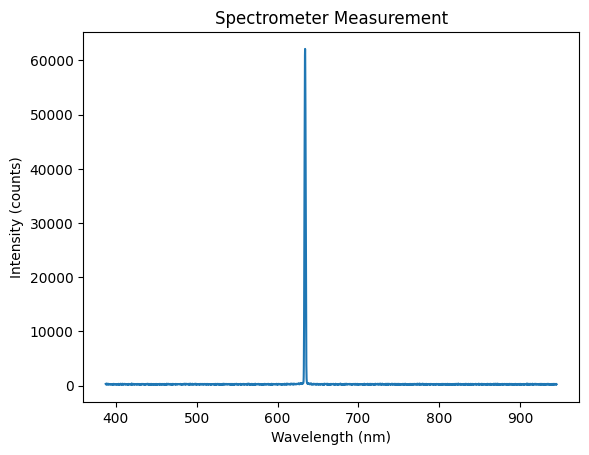

In [17]:
data = spec.Get_Signal(verbose=True)

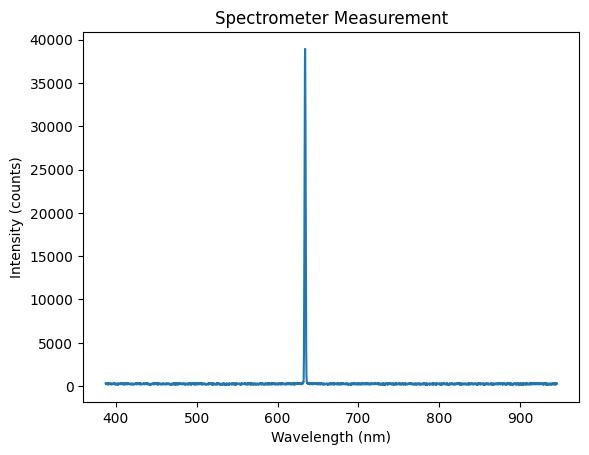

La señal máxima es: 38920.0


In [23]:
signal = spec.Get_Measurement(mode='max', verbose=True)
print("La señal máxima es:", signal)

In [29]:
signal = spec.Get_Measurement(mode='integral', verbose=True)
print("La señal integral es:", signal)

La señal integral es: 16652.2


In [36]:
signal = spec.Get_Measurement(mode='integral', wavelength= 633, width= 4, verbose=True)
print("La señal integral es:", signal)

La señal integral es: 15045.36


### Análisis estabilidad de las medidas

Ahora que ya vemos que funciona, podemos realizar una medida de estabilidad del láser con Spectrometer_Stability(Nmeasurements, Twait, mode)

In [ ]:
# Spectrometer stability test
Twait = 1                 # Tiempo entre medidas (s)
Nmeasurements = 20         # Número de medidas
S0, S0_error = spec.Spectrometer_Stability(Nmeasurements, Twait, mode = "max")

The mode of the signal is: integral
The resuts are: of 300 done
   - Signal channel          : 14996.3212 +- 53.5145 V.
   - Reference channel       : 14996.3212 +- 53.5145 V.
   - Ratio error             : 0.00 %.
   - Error in corrected I    : 0.62 %.


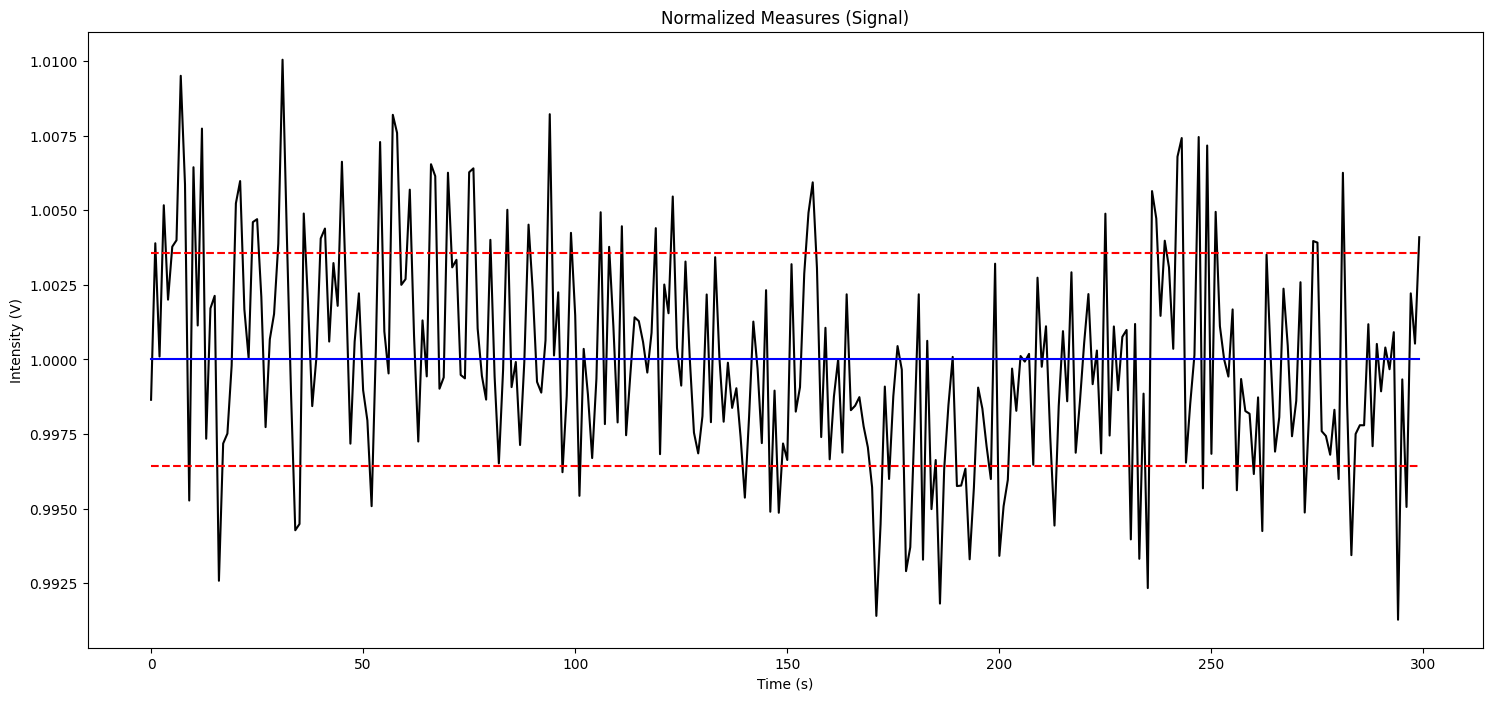

In [37]:
# Spectrometer stability test
Twait = 0.1                 # Tiempo entre medidas (s)
Nmeasurements = 300         # Número de medidas
S0, S0_error = spec.Spectrometer_Stability(Nmeasurements, Twait, mode = "integral", wavelength= 633, width= 4)

### Cierre del espectrómetro

Para cerrar el espectrómetro, simplemente usamos la función Close()

In [39]:
# Disconnect the spectrometer
spec.Close()

Spectrometer already disconnected!
